In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
merged = pickle.load(open('merged.pkl', 'rb'))

In [3]:
all_df = pd.concat([merged['train'], merged['test']], axis=0).reset_index(drop=True)

In [4]:
null_info = all_df.isnull().sum()
null_info[null_info>0]

price                                   115947
image_top_1                             155197
avg_days_up_user                        460701
avg_times_up_user                       460701
city_mean_price                              5
city_mean_image_top_1                       24
param_1_mean_price                          11
param_1_mean_image_top_1                  8205
param_2_mean_price                           4
param_2_mean_image_top_1                     6
param_3_mean_price                           7
param_3_mean_image_top_1                  3623
image_top_1_nunique_item_id             155197
image_top_1_nunique_user_id             155197
image_top_1_nunique_category_name       155197
image_top_1_nunique_param_1             155197
image_top_1_nunique_item_seq_number     155197
image_top_1_mean_price_pred             155197
image_top_1_std_price_pred              155201
image_top_1_mean_item_seq_number        155197
user_id_image_top_1_mean_ridge_preds    155197
dtype: int64

In [5]:
all_df.columns.tolist()

['price',
 'image_top_1',
 'item_seq_number',
 'activation_weekday',
 'avg_days_up_user',
 'avg_times_up_user',
 'n_user_items',
 'cat_features_user_id_category_name_Одежда, обувь, аксессуары',
 'cat_features_user_id_category_name_Детская одежда и обувь',
 'cat_features_user_id_category_name_Товары для детей и игрушки',
 'cat_features_user_id_category_name_Предложение услуг',
 'cat_features_user_id_category_name_Квартиры',
 'cat_features_user_id_category_name_Ремонт и строительство',
 'cat_features_user_id_category_name_Мебель и интерьер',
 'cat_features_user_id_category_name_Телефоны',
 'cat_features_user_id_category_name_Коллекционирование',
 'cat_features_user_id_category_name_Автомобили',
 'cat_features_user_id_category_name_Дома, дачи, коттеджи',
 'cat_features_user_id_category_name_Товары для компьютера',
 'cat_features_user_id_category_name_Аудио и видео',
 'cat_features_user_id_category_name_Красота и здоровье',
 'cat_features_user_id_category_name_Спорт и отдых',
 'cat_feature

In [6]:
categorical = ['image_top_1', 'region', 'city', 'parent_category_name', 'category_name', 'user_type', 'param_1', 
               'param_2', 'param_3', 'lat_lon_hdbscan_cluster_05_03', 'lat_lon_hdbscan_cluster_10_03', 
               'lat_lon_hdbscan_cluster_20_03',]
numerical = [f for f in all_df.columns.tolist() if f not in categorical]

# box cox transform for highly skewed columns
box_cox_cols = ['avg_days_up_user', 'avg_times_up_user', 'n_user_items', 'price', 'item_seq_number',
                'price_pred', 'price_pred_onlydescription', 'price_pred_all', 'active_price_pred']

### Make numerical variables normal

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

avg_days_up_user  old min\max 0.0 19.0
box-cox transformed  avg_days_up_user  with optimal lambda = 1.07993226802
new min\max 0.0 22.6043


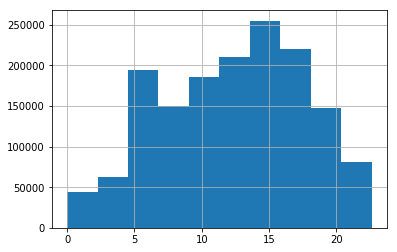

avg_times_up_user  old min\max 1.0 12.6977
box-cox transformed  avg_times_up_user  with optimal lambda = -0.269007761803
new min\max 0.0 1.84097


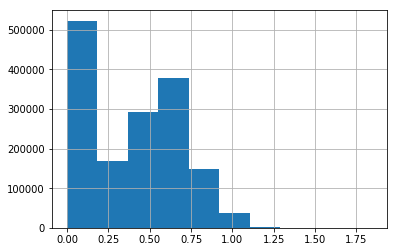

n_user_items  old min\max 1.0 6106.0
box-cox transformed  n_user_items  with optimal lambda = -0.200599261827
new min\max 0.0 4.1176


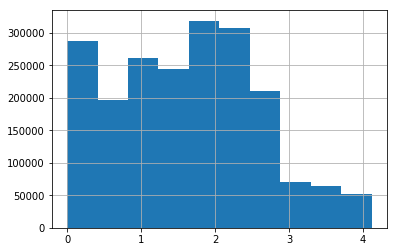

price  old min\max 0.0 25.099
box-cox transformed  price  with optimal lambda = 0.384114219227
new min\max 0.0 6.51011


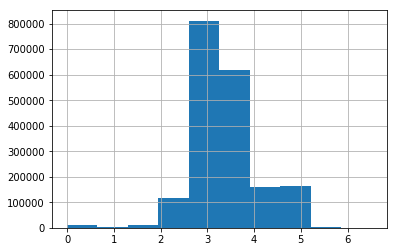

item_seq_number  old min\max 1.0 205064.0
box-cox transformed  item_seq_number  with optimal lambda = -0.105988306514
new min\max 0.0 6.85427


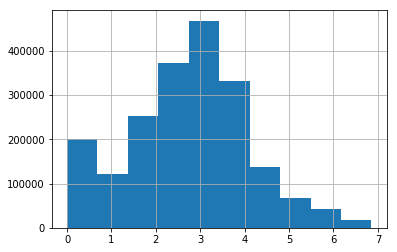

price_pred  old min\max -2.83684 21.1291
box-cox transformed  price_pred  with optimal lambda = 0.400337918015
new min\max 0.0 6.55912


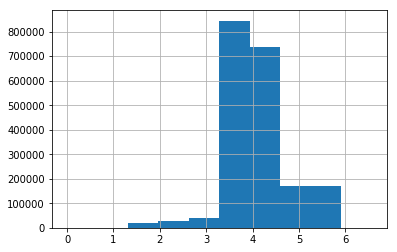

price_pred_onlydescription  old min\max -2.80899 20.5134
box-cox transformed  price_pred_onlydescription  with optimal lambda = 0.388964307231
new min\max 0.0 6.32512


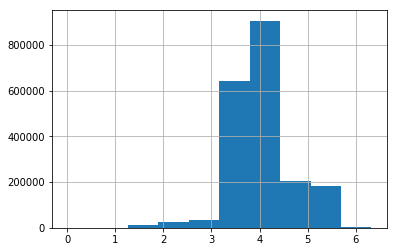

price_pred_all  old min\max -2.66849 20.0592
box-cox transformed  price_pred_all  with optimal lambda = 0.218968502994
new min\max 0.0 4.56913


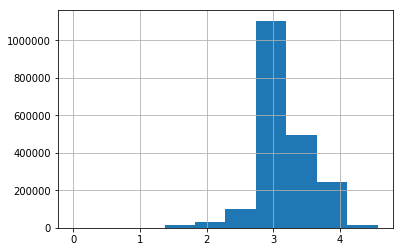

active_price_pred  old min\max -0.990591 1.25995e+09
box-cox transformed  active_price_pred  with optimal lambda = -0.143518276948
new min\max 0.0 6.62338


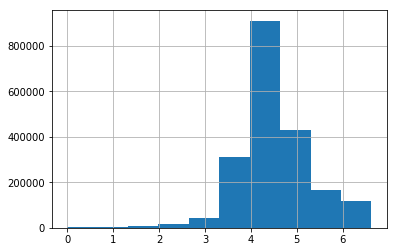

In [8]:
# step 1: box-cox transformation on non-NA values

from scipy.stats import boxcox

for col in box_cox_cols:
    all_df[col] = all_df[col].astype('float32')
    filter_ = ~all_df[col].isnull()
    selected_values = all_df.loc[filter_, col].values
    
    print(col, ' old min\max', selected_values.min(), selected_values.max())
    
    # just shift to positive first
    selected_values = selected_values - selected_values.min() + 1
       
    selected_values, ld = boxcox(selected_values)
    print('box-cox transformed ', col, ' with optimal lambda =', ld)
    print('new min\max', selected_values.min(), selected_values.max())
    
    all_df.loc[filter_, col] = selected_values
    all_df[col].hist()
    plt.show()

price 3.35654 0.697428


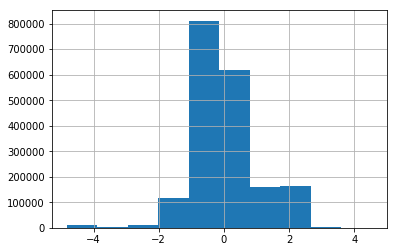

item_seq_number 2.75118 1.35081


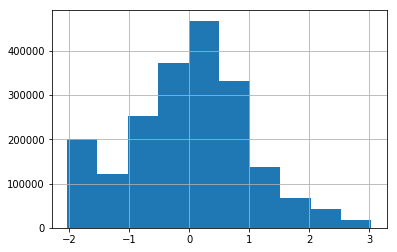

activation_weekday 2.89747 2.01289


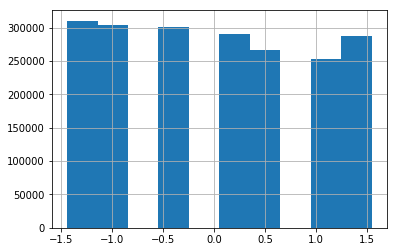

avg_days_up_user 12.4367 5.1476


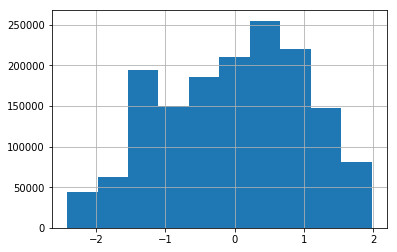

avg_times_up_user 0.382142 0.300125


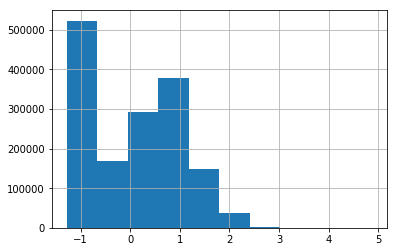

n_user_items 1.62214 1.00914


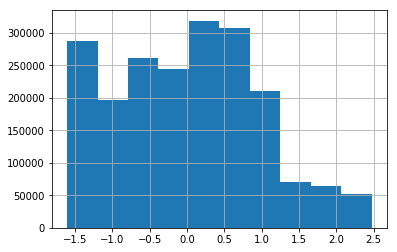

cat_features_user_id_category_name_Одежда, обувь, аксессуары 0.193991 0.300546


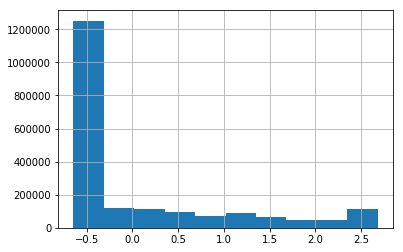

cat_features_user_id_category_name_Детская одежда и обувь 0.167829 0.291224


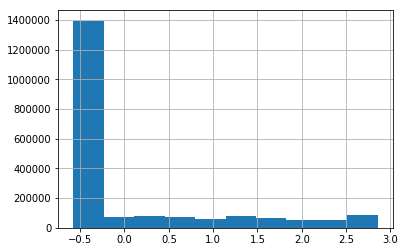

cat_features_user_id_category_name_Товары для детей и игрушки 0.0624633 0.172876


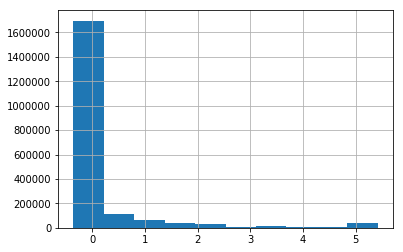

cat_features_user_id_category_name_Предложение услуг 0.0491815 0.17813


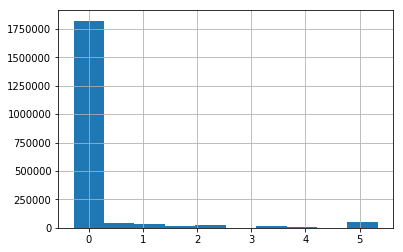

cat_features_user_id_category_name_Квартиры 0.0583755 0.202898


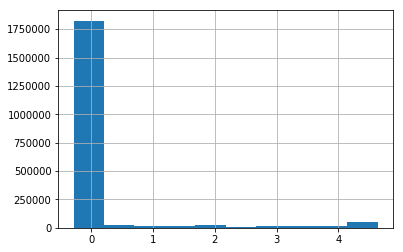

cat_features_user_id_category_name_Ремонт и строительство 0.0381918 0.14958


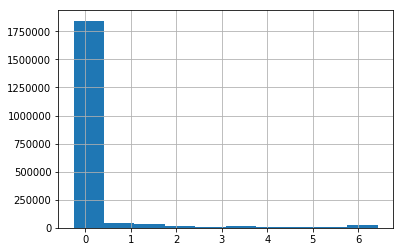

cat_features_user_id_category_name_Мебель и интерьер 0.0418319 0.14816


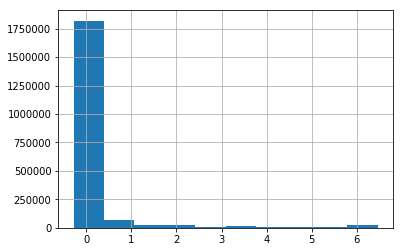

cat_features_user_id_category_name_Телефоны 0.0428883 0.159718


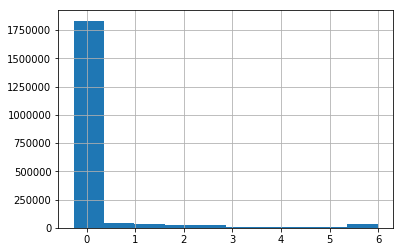

cat_features_user_id_category_name_Коллекционирование 0.0162562 0.0961578


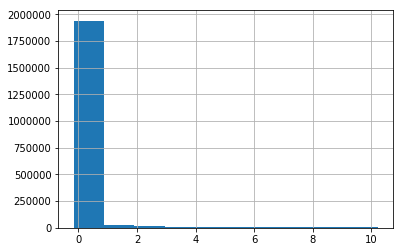

cat_features_user_id_category_name_Автомобили 0.0422435 0.180072


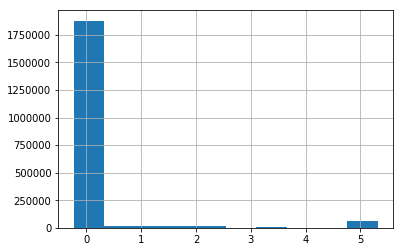

cat_features_user_id_category_name_Дома, дачи, коттеджи 0.0219601 0.112385


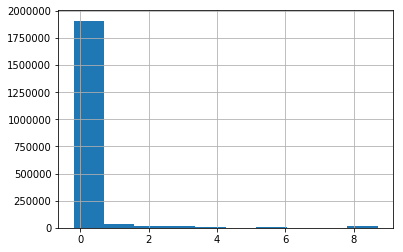

cat_features_user_id_category_name_Товары для компьютера 0.019474 0.101071


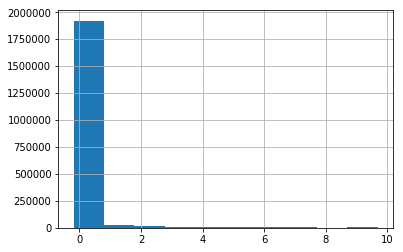

cat_features_user_id_category_name_Аудио и видео 0.0176143 0.0866147


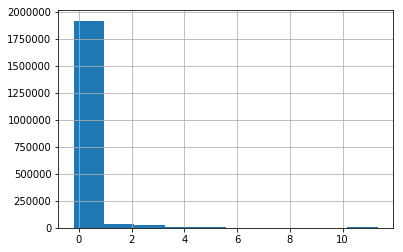

cat_features_user_id_category_name_Красота и здоровье 0.0184323 0.0917057


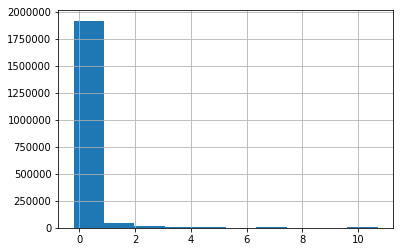

cat_features_user_id_category_name_Спорт и отдых 0.0166365 0.0907345


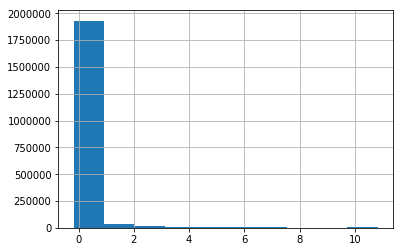

cat_features_user_id_category_name_Бытовая техника 0.0204602 0.0993984


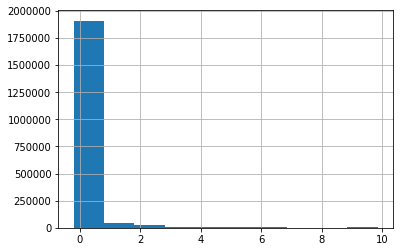

cat_features_user_id_category_name_Часы и украшения 0.0108942 0.0689984


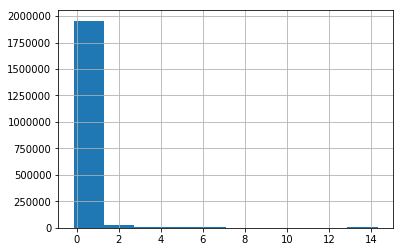

cat_features_user_id_category_name_Книги и журналы 0.00853581 0.0629891


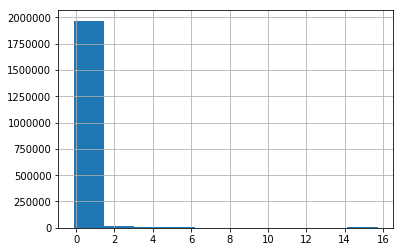

cat_features_user_id_category_name_Оборудование для бизнеса 0.0104421 0.0866666


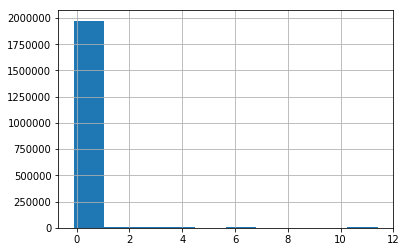

cat_features_user_id_category_name_Земельные участки 0.0119381 0.0818329


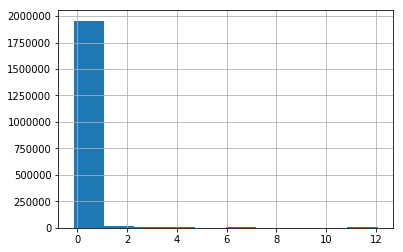

cat_features_user_id_category_name_Посуда и товары для кухни 0.00625203 0.0422904


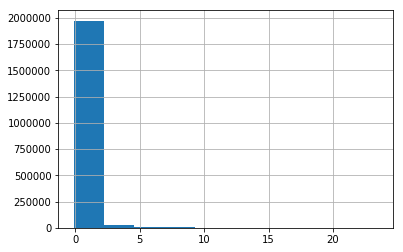

cat_features_user_id_category_name_Товары для животных 0.00564415 0.0556497


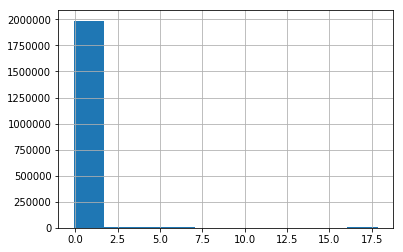

cat_features_user_id_category_name_Фототехника 0.00599244 0.0508434


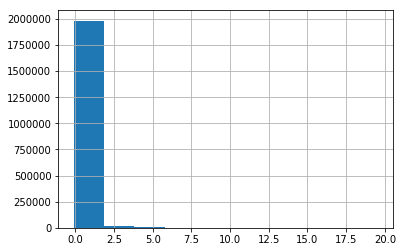

cat_features_user_id_category_name_Игры, приставки и программы 0.00726788 0.0661323


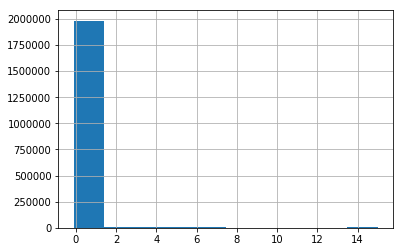

cat_features_user_id_category_name_Грузовики и спецтехника 0.00669428 0.0696467


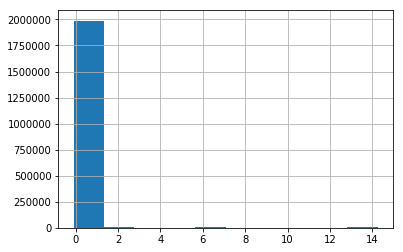

cat_features_user_id_category_name_Коммерческая недвижимость 0.00557982 0.0574477


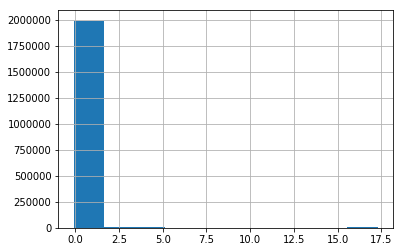

cat_features_user_id_category_name_Оргтехника и расходники 0.00464085 0.0430791


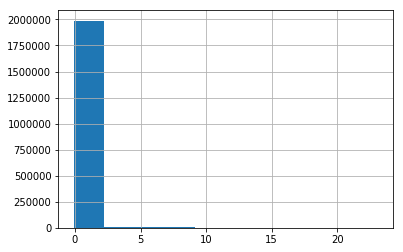

cat_features_user_id_category_name_Растения 0.00578021 0.0563039


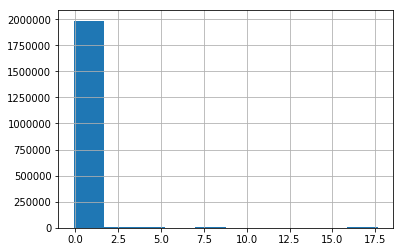

cat_features_user_id_category_name_Гаражи и машиноместа 0.00548041 0.0565584


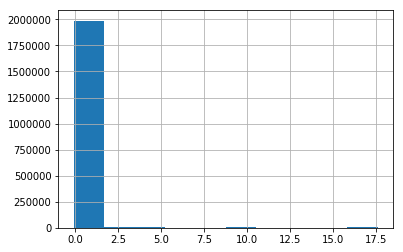

cat_features_user_id_category_name_Планшеты и электронные книги 0.00561946 0.0455959


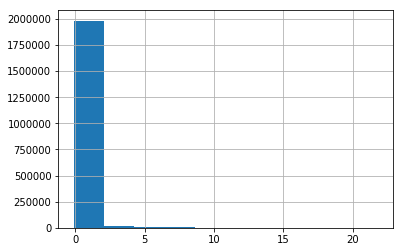

cat_features_user_id_category_name_Велосипеды 0.00671663 0.0644519


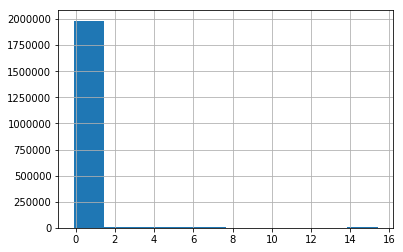

cat_features_user_id_category_name_Комнаты 0.00572804 0.0563982


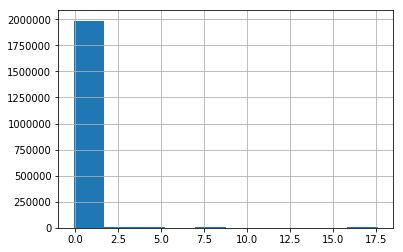

cat_features_user_id_category_name_Музыкальные инструменты 0.00450904 0.0533766


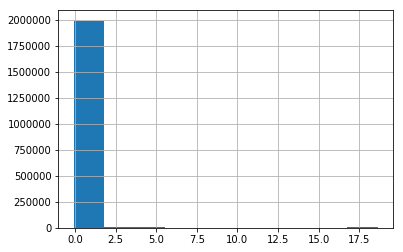

cat_features_user_id_category_name_Собаки 0.00738068 0.0745595


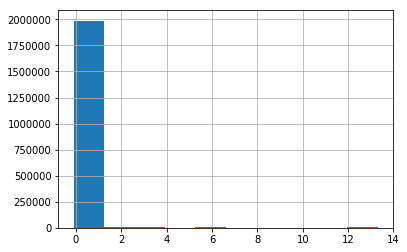

cat_features_user_id_category_name_Ноутбуки 0.00644552 0.0579551


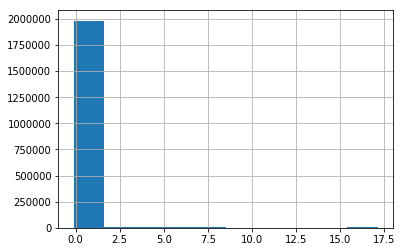

cat_features_user_id_category_name_Другие животные 0.00715278 0.0718134


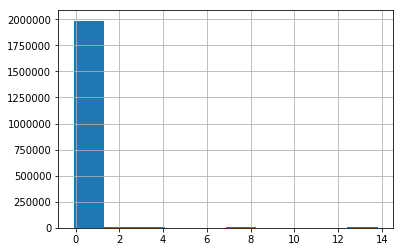

cat_features_user_id_category_name_Охота и рыбалка 0.0029671 0.0391227


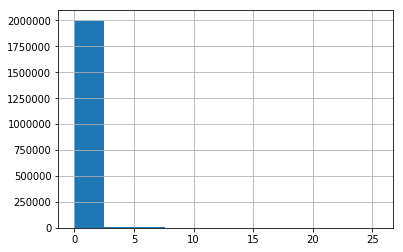

cat_features_user_id_category_name_Продукты питания 0.00377381 0.0452648


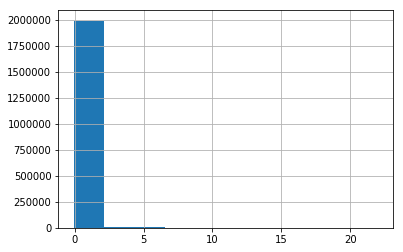

cat_features_user_id_category_name_Настольные компьютеры 0.00389743 0.0414409


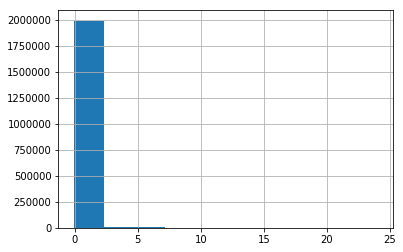

cat_features_user_id_category_name_Кошки 0.0065893 0.0690558


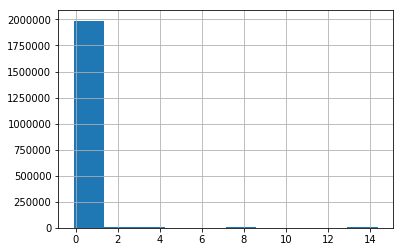

cat_features_user_id_category_name_Аквариум 0.00307345 0.0439035


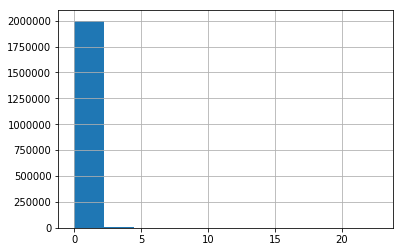

cat_features_user_id_category_name_Мотоциклы и мототехника 0.00404404 0.0527967


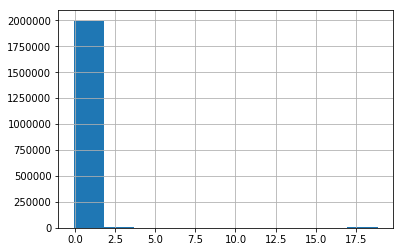

cat_features_user_id_category_name_Птицы 0.00398686 0.0535234


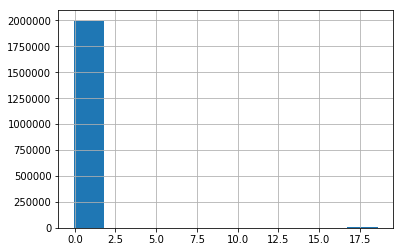

cat_features_user_id_category_name_Водный транспорт 0.00156953 0.0321247


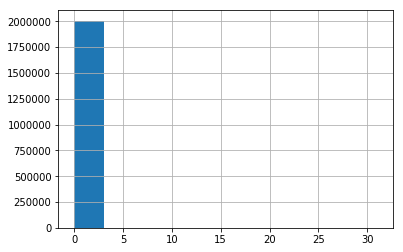

cat_features_user_id_category_name_Готовый бизнес 0.00140223 0.0305211


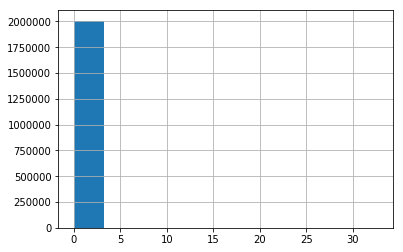

cat_features_user_id_category_name_Билеты и путешествия 0.00208178 0.042415


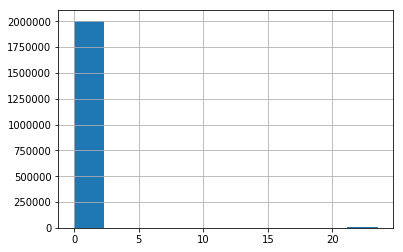

cat_features_user_id_category_name_Недвижимость за рубежом 8.97732e-05 0.00706164


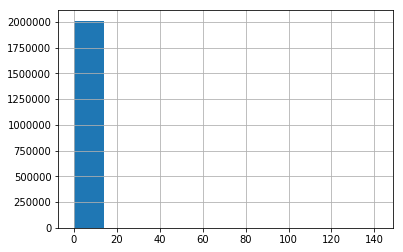

price_pred 4.10165 0.658399


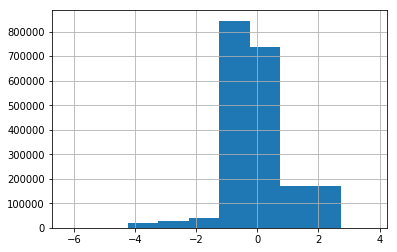

price_pred_onlydescription 4.0479 0.606728


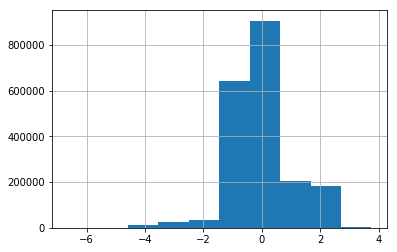

price_pred_all 3.15688 0.41236


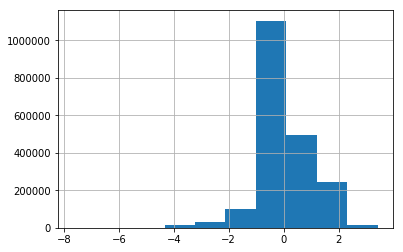

ridge_preds 0.141769 0.121002


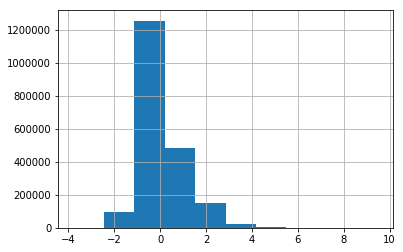

ridge_preds_title 7.6217 2.48443


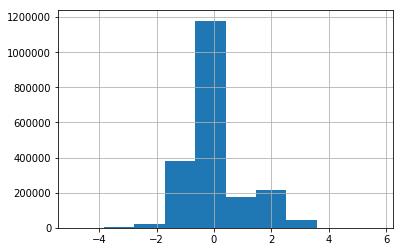

ridge_preds_description 7.54527 2.30546


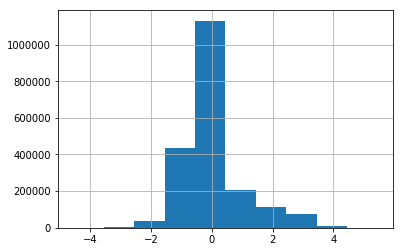

ga 7.6297 2.77054


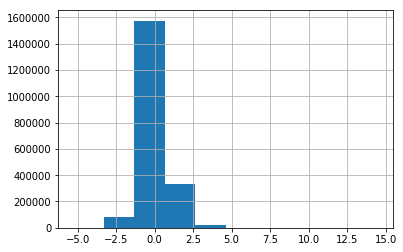

title_tfidf_svd_1 0.0192423 0.109219


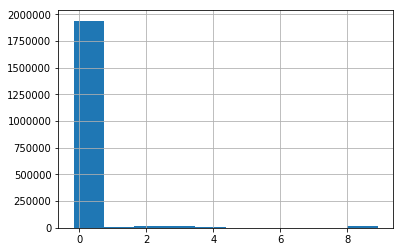

title_tfidf_svd_2 0.0292113 0.106063


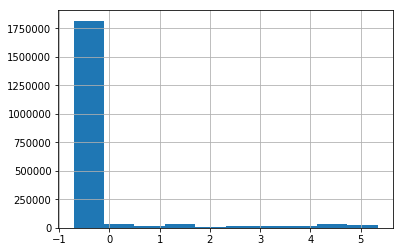

title_tfidf_svd_3 0.0140044 0.0792315


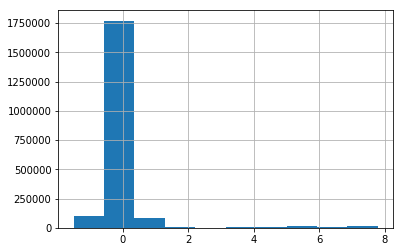

title_tfidf_svd_4 0.0114064 0.0763312


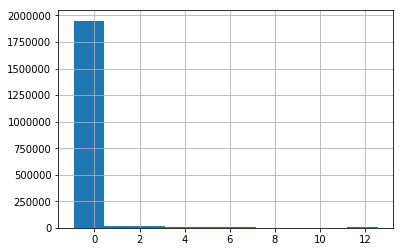

title_tfidf_svd_5 0.00897405 0.0735737


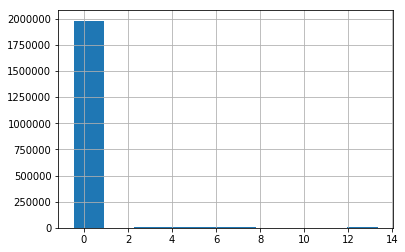

description_tfidf_svd_1 0.057801 0.233357


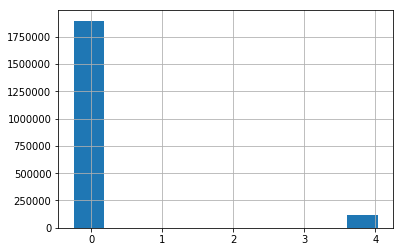

description_tfidf_svd_2 0.0328815 0.0761333


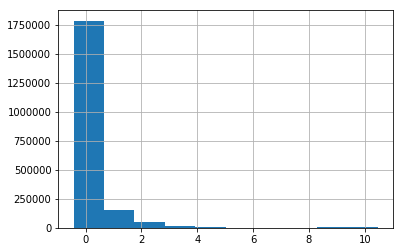

description_tfidf_svd_3 0.00466159 0.0637975


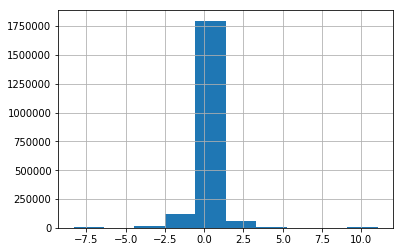

description_tfidf_svd_4 0.0311852 0.0495288


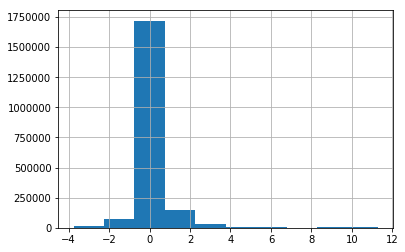

description_tfidf_svd_5 0.0211655 0.0457283


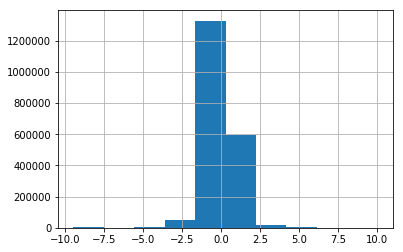

region_mean_price 308427.0 309722.0


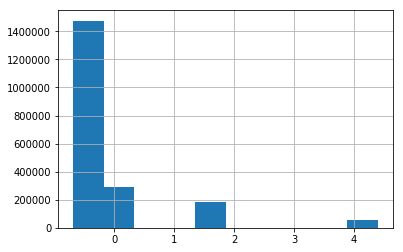

region_mean_image_top_1 1256.97 91.9593


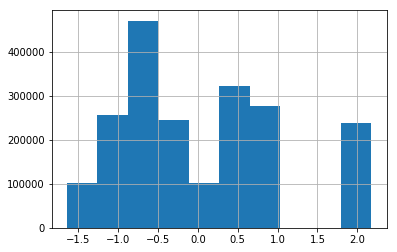

region_mean_item_seq_number 764.26 741.768


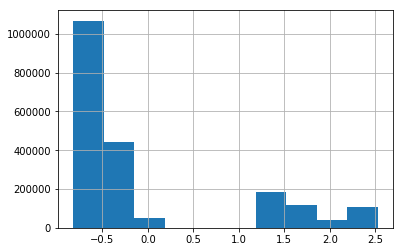

region_mean_price_pred 7.34833 0.325739


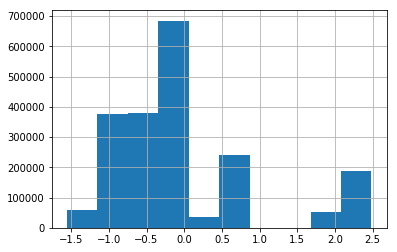

region_mean_price_pred_all 7.60943 0.332163


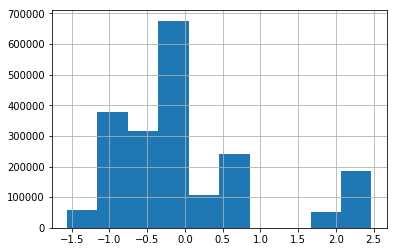

region_mean_ridge_preds 0.141769 0.00770923


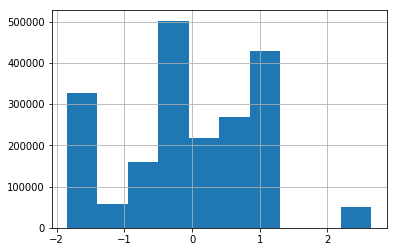

city_mean_price 308970.0 1.34777e+06


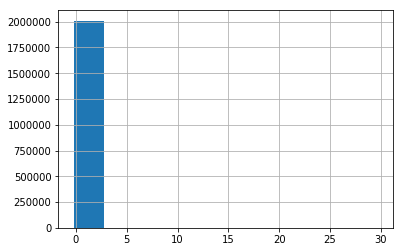

city_mean_image_top_1 1258.91 119.089


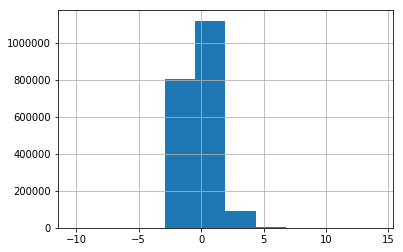

city_mean_item_seq_number 764.26 1161.22


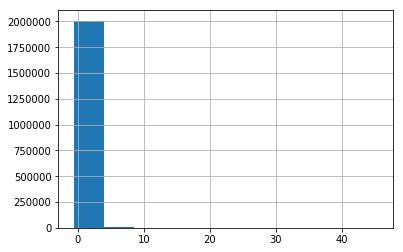

city_mean_price_pred 7.34833 0.532751


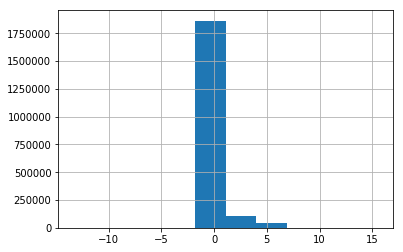

city_mean_price_pred_all 7.60943 0.547105


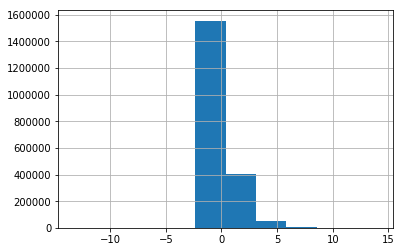

city_mean_ridge_preds 0.141769 0.0146916


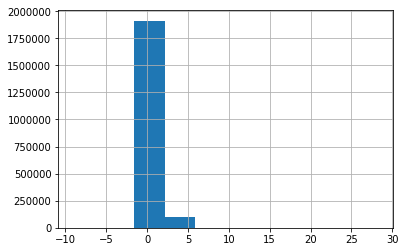

parent_category_name_mean_price 317153.0 805358.0


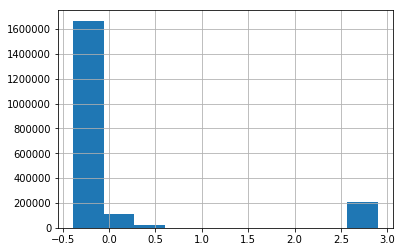

parent_category_name_mean_image_top_1 1296.27 823.429


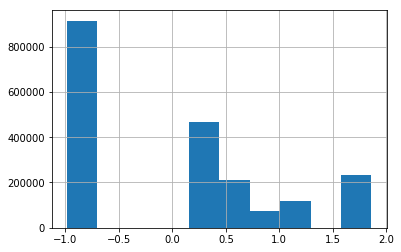

parent_category_name_mean_item_seq_number 764.26 1079.87


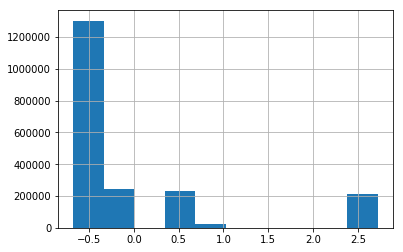

parent_category_name_mean_price_pred 7.34833 2.17126


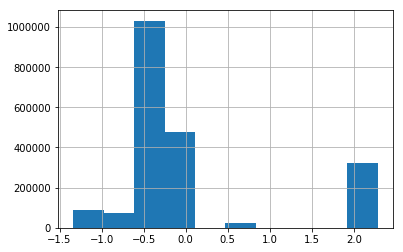

parent_category_name_mean_price_pred_all 7.60943 2.20611


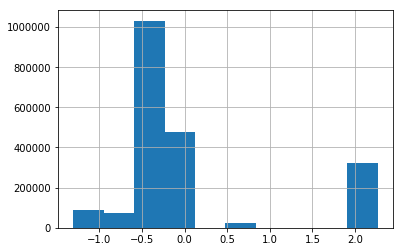

parent_category_name_mean_ridge_preds 0.141769 0.0696917


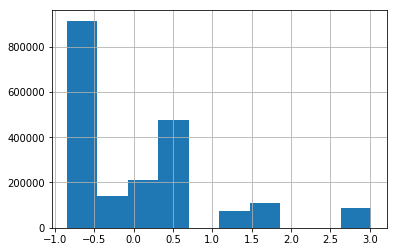

category_name_mean_price 322870.0 1.02459e+06


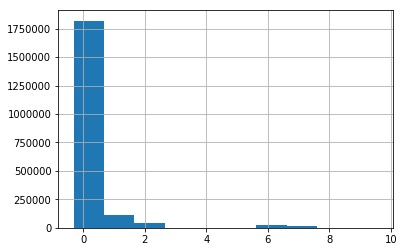

category_name_mean_image_top_1 1294.56 853.893


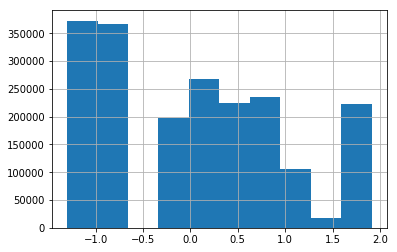

category_name_mean_item_seq_number 764.26 1277.02


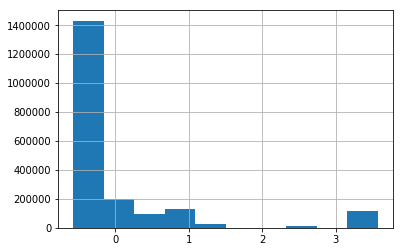

category_name_mean_price_pred 7.34833 2.26338


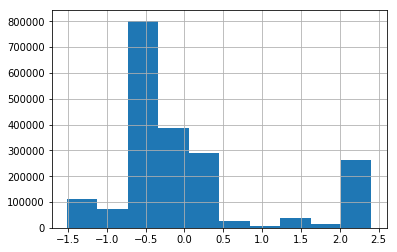

category_name_mean_price_pred_all 7.60943 2.29574


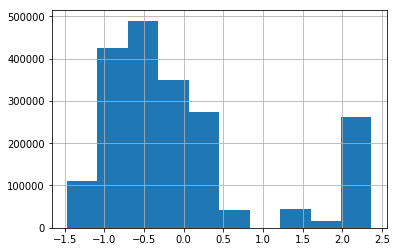

category_name_mean_ridge_preds 0.141769 0.0815055


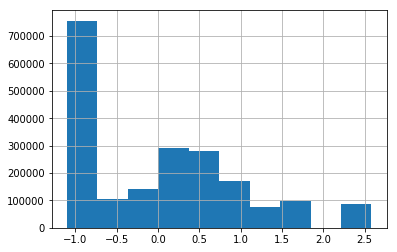

user_type_mean_price 305782.0 262352.0


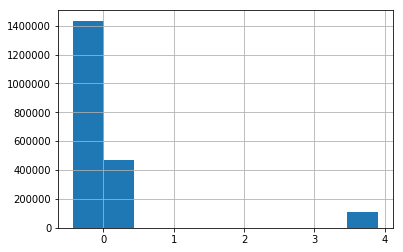

user_type_mean_image_top_1 1253.4 177.357


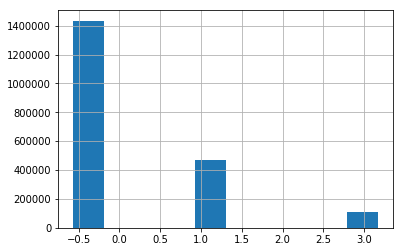

user_type_mean_item_seq_number 764.26 2355.46


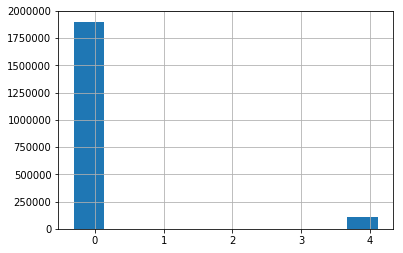

user_type_mean_price_pred 7.34833 0.723234


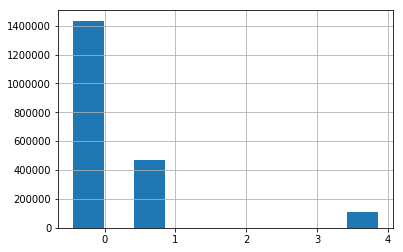

user_type_mean_price_pred_all 7.60943 0.720146


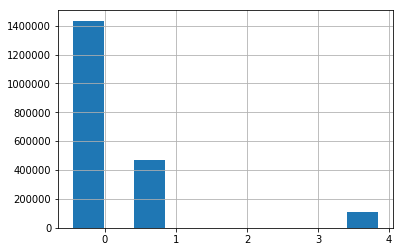

user_type_mean_ridge_preds 0.141769 0.0108151


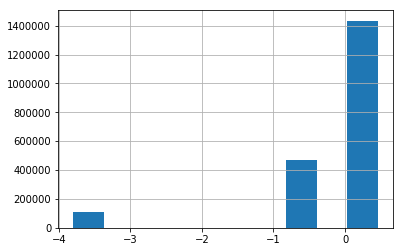

param_1_mean_price 311422.0 896522.0


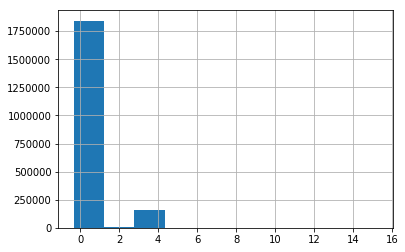

param_1_mean_image_top_1 1295.8 834.244


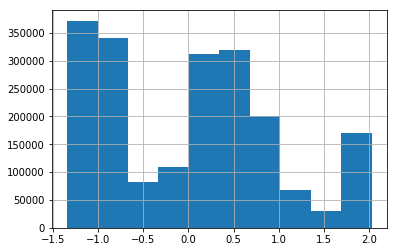

param_1_mean_item_seq_number 764.26 1312.04


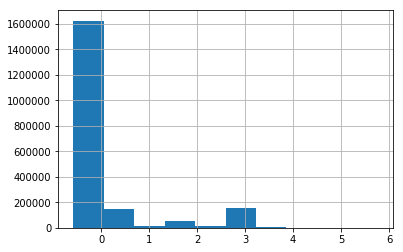

param_1_mean_price_pred 7.34833 2.39094


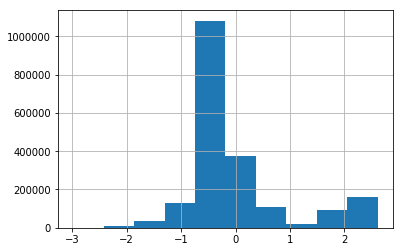

param_1_mean_price_pred_all 7.60943 2.42075


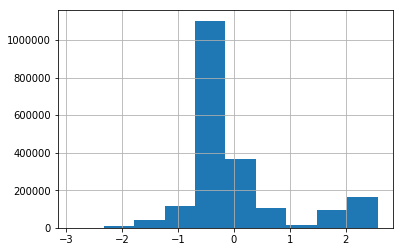

param_1_mean_ridge_preds 0.141769 0.0899765


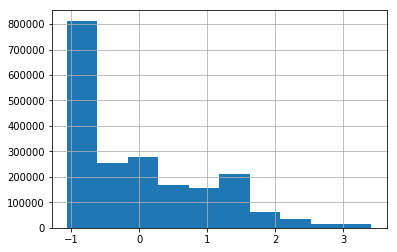

param_2_mean_price 321170.0 1.24931e+06


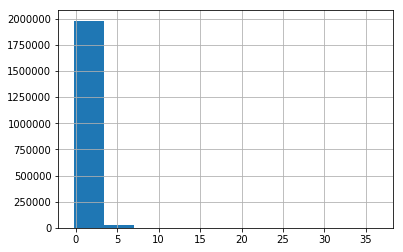

param_2_mean_image_top_1 1291.48 704.707


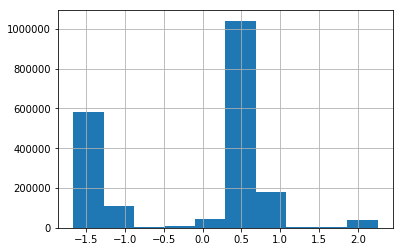

param_2_mean_item_seq_number 764.26 1322.16


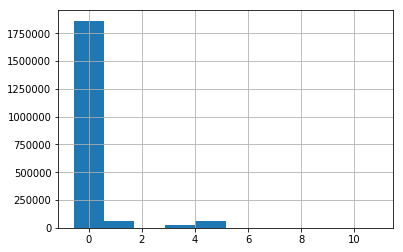

param_2_mean_price_pred 7.34833 2.18004


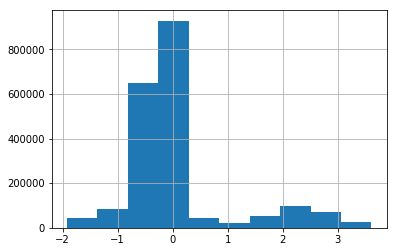

param_2_mean_price_pred_all 7.60943 2.20833


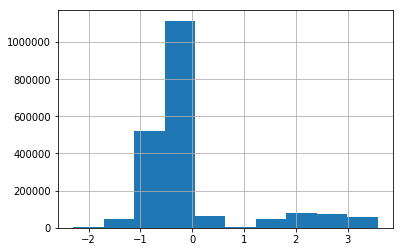

param_2_mean_ridge_preds 0.141769 0.0806907


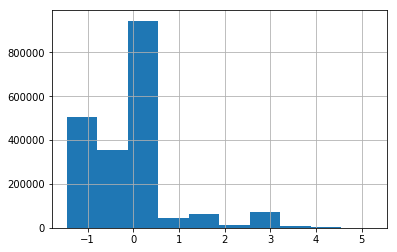

param_3_mean_price 310135.0 543132.0


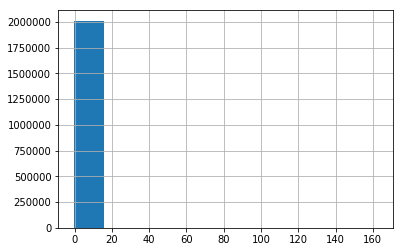

param_3_mean_image_top_1 1290.42 650.243


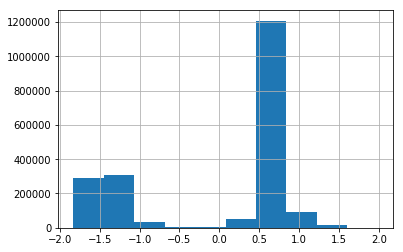

param_3_mean_item_seq_number 764.26 1289.18


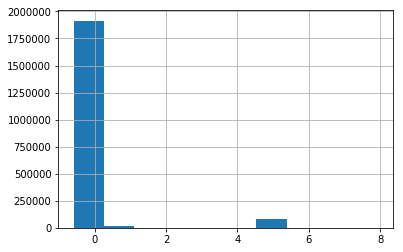

param_3_mean_price_pred 7.34833 1.85042


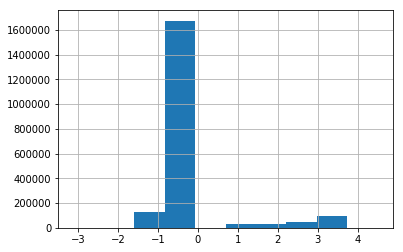

param_3_mean_price_pred_all 7.60943 1.86972


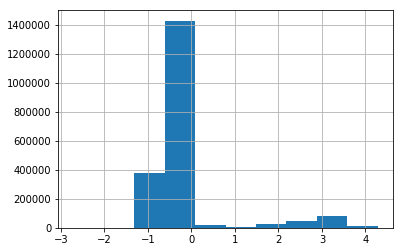

param_3_mean_ridge_preds 0.141769 0.0647704


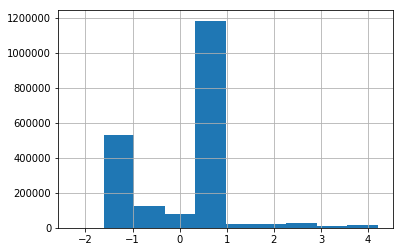

user_id_nunique_parent_category_name 1.3129 0.675341


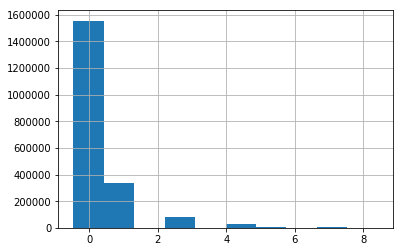

user_id_nunique_category_name 1.83717 1.70309


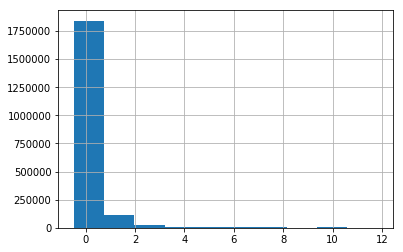

user_id_nunique_param_1 2.38357 4.54579


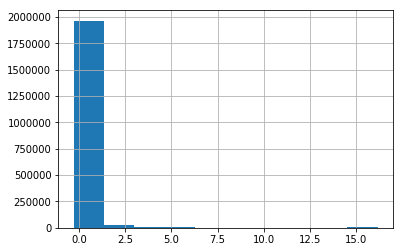

user_id_nunique_param_2 2.31749 2.37253


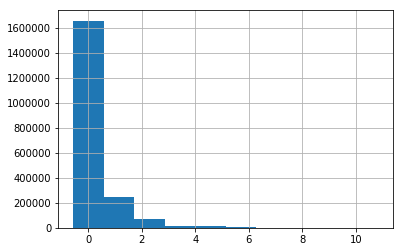

user_id_nunique_param_3 2.20534 2.84617


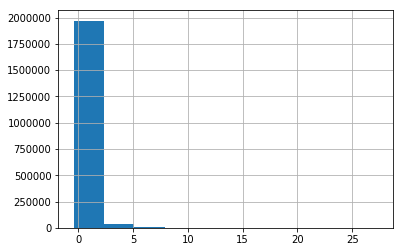

user_id_nunique_activation_date 2.52067 3.35938


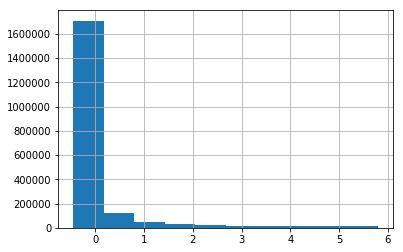

user_id_activation_date_count_item_id 4.51161 11.3968


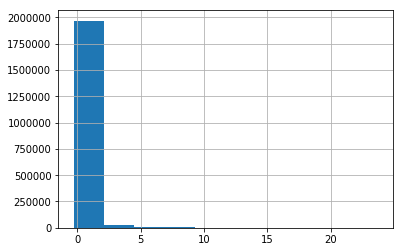

image_top_1_nunique_item_id 4385.12 5853.78


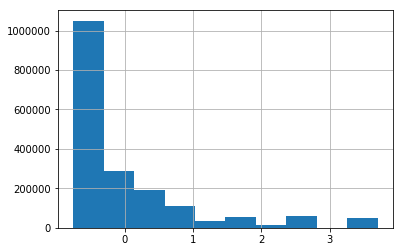

image_top_1_nunique_user_id 3657.57 4732.91


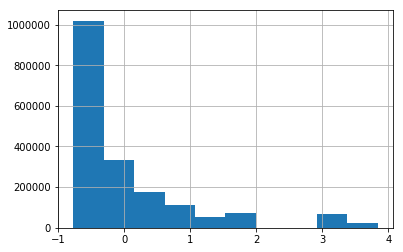

image_top_1_nunique_category_name 14.2951 8.565


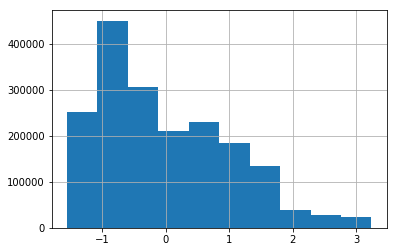

image_top_1_nunique_param_1 28.128 19.2856


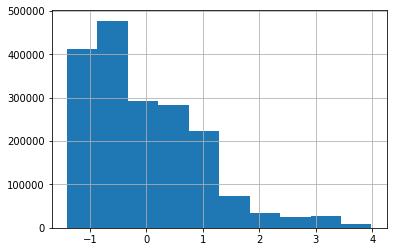

image_top_1_nunique_item_seq_number 673.814 1149.17


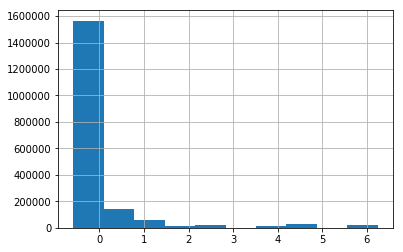

image_top_1_mean_price_pred 7.62473 2.07093


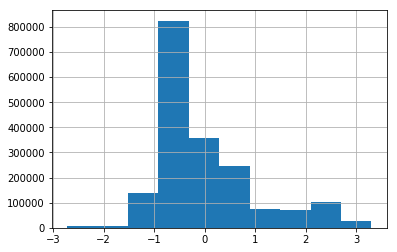

image_top_1_std_price_pred 1.50057 1.02041


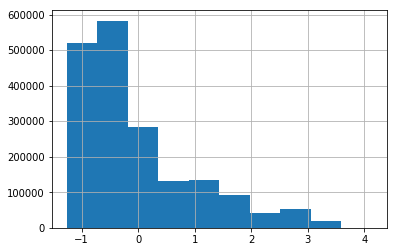

image_top_1_mean_item_seq_number 812.367 1640.68


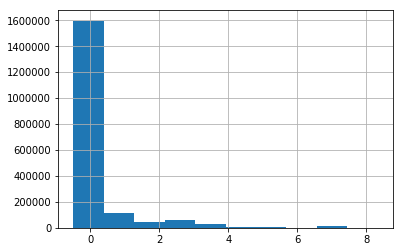

user_id_mean_ridge_preds 0.141769 0.109259


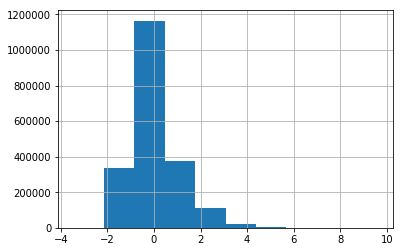

user_id_category_name_mean_ridge_preds 0.141769 0.116274


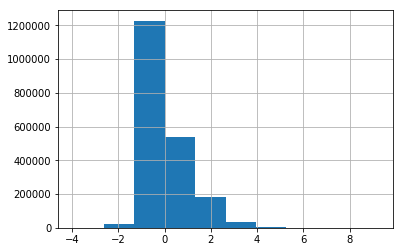

user_id_image_top_1_mean_ridge_preds 0.136021 0.117587


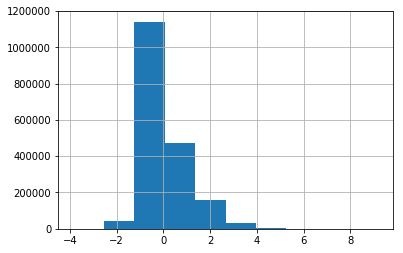

user_id_category_name_sum_ridge_preds 1.00055 4.50274


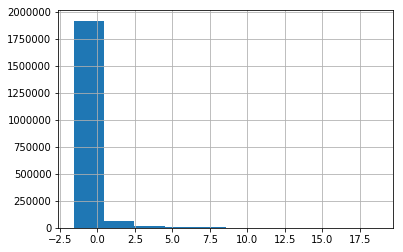

region_te 0.139115 0.0093586


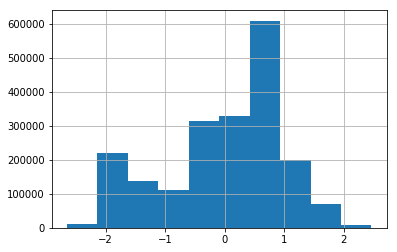

city_te 0.139036 0.0162358


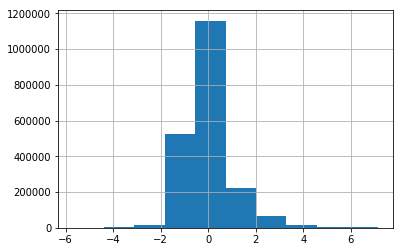

parent_category_name_te 0.140343 0.0801349


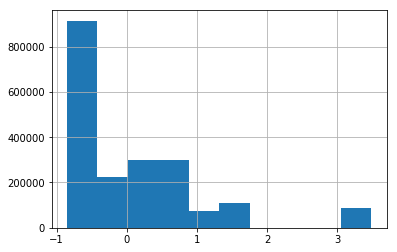

category_name_te 0.14069 0.0913886


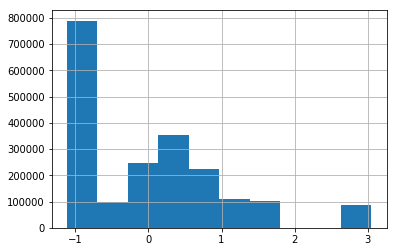

user_type_te 0.138971 0.0211996


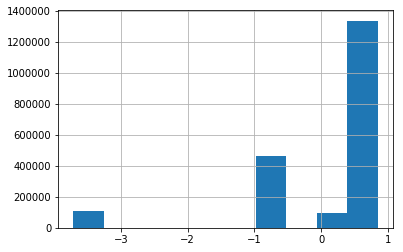

image_top_1_te 0.137241 0.0924928


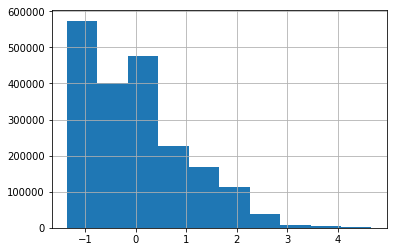

latitude 53.2622 4.25229


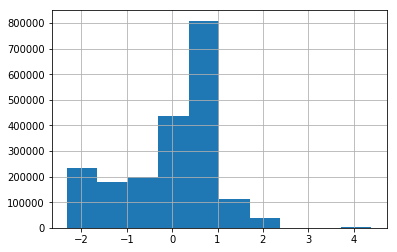

longitude 55.714 18.2848


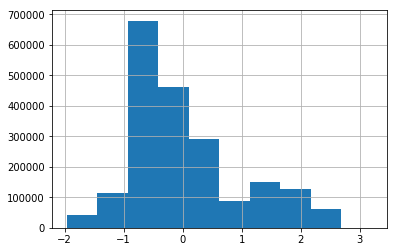

cityxcatxusertypeitem_num 6.25527 2.12561


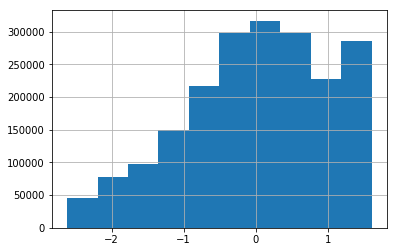

cityxcatxusertypecity_fm_factor_0 -0.120618 0.0777285


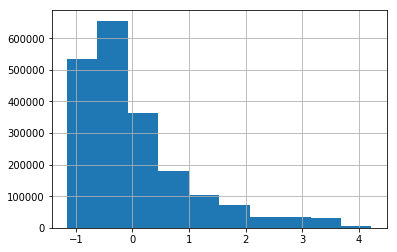

cityxcatxusertypecity_fm_factor_1 0.0153232 0.0573134


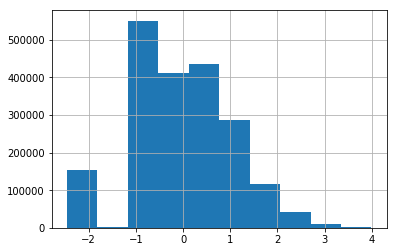

cityxcatxusertypecategory_name_fm_factor_0 0.173416 0.0669462


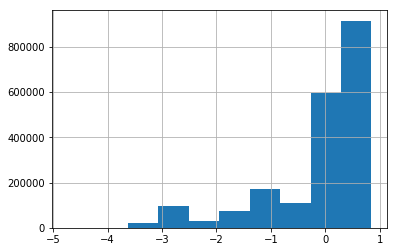

cityxcatxusertypecategory_name_fm_factor_1 0.181166 0.0847599


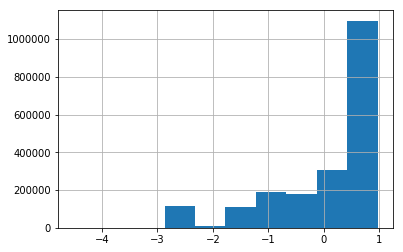

cityxcatxusertypeuser_type_fm_factor_0 0.16412 0.0382676


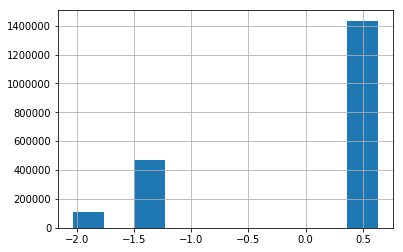

cityxcatxusertypeuser_type_fm_factor_1 -0.0636752 0.0935215


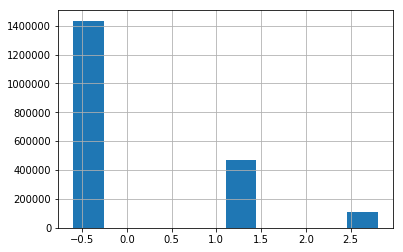

cityxcatxusertypecity_fm_bias -0.0651936 0.0505919


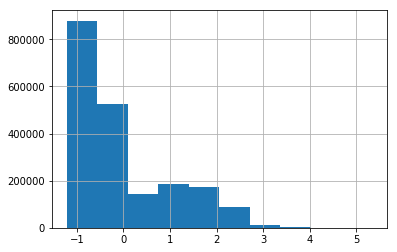

cityxcatxusertypecategory_name_fm_bias -0.0607779 0.0583814


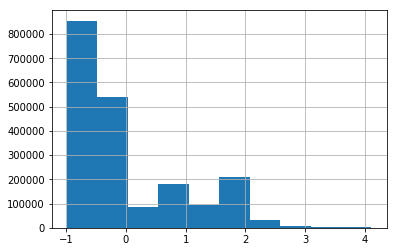

cityxcatxusertypeuser_type_fm_bias 0.0526677 0.0395437


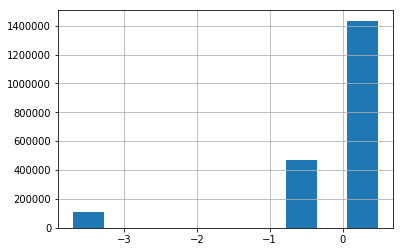

imgxcityxcatitem_num 3.0111 1.75142


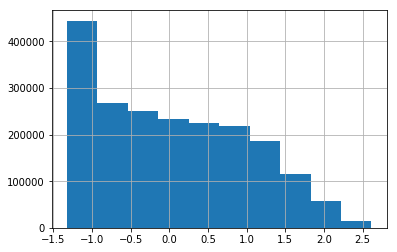

imgxcityxcatimage_top_1_fm_factor_0 0.00562059 0.110169


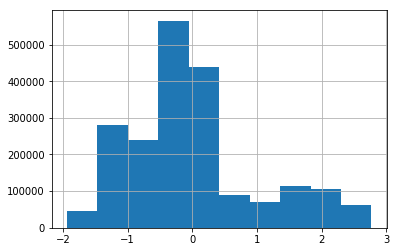

imgxcityxcatimage_top_1_fm_factor_1 0.00232051 0.114311


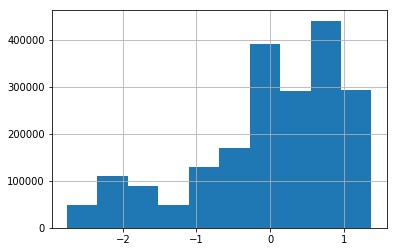

imgxcityxcatcity_fm_factor_0 -0.0150775 0.0187194


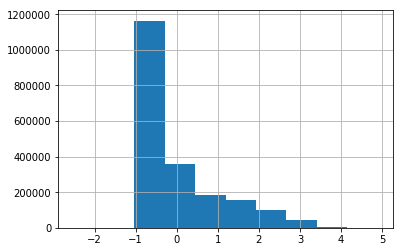

imgxcityxcatcity_fm_factor_1 0.0423863 0.0425187


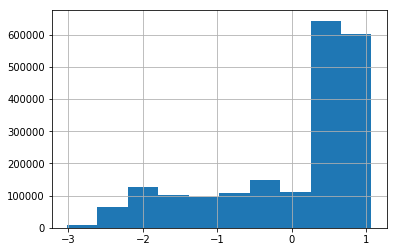

imgxcityxcatcategory_name_fm_factor_0 0.154208 0.352239


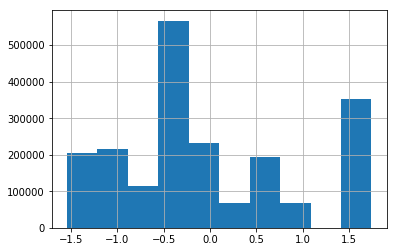

imgxcityxcatcategory_name_fm_factor_1 -0.295145 0.461225


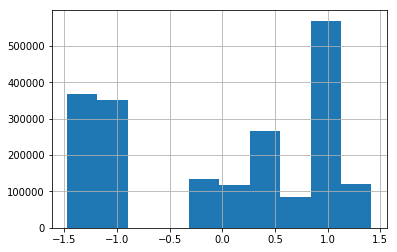

imgxcityxcatimage_top_1_fm_bias -0.00821966 0.0936995


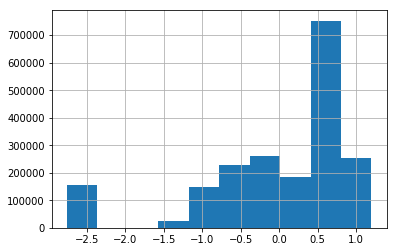

imgxcityxcatcity_fm_bias -0.0850966 0.0487714


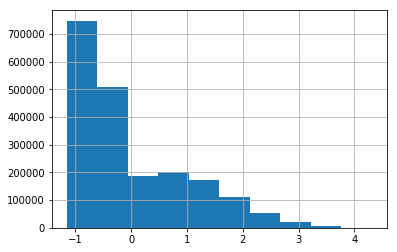

imgxcityxcatcategory_name_fm_bias -0.0155531 0.115605


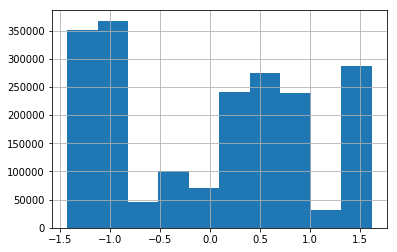

imgxisqnxusertypeitem_num 2.92052 2.15262


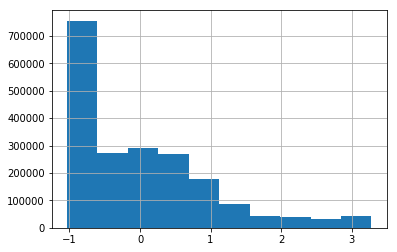

imgxisqnxusertypeimage_top_1_fm_factor_0 0.0560542 0.0497506


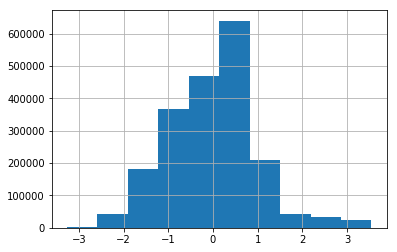

imgxisqnxusertypeimage_top_1_fm_factor_1 0.0392161 0.0583904


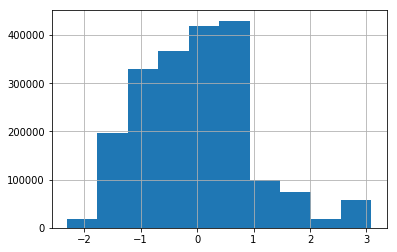

imgxisqnxusertypeitem_seq_number_fm_factor_0 0.0776378 0.0921112


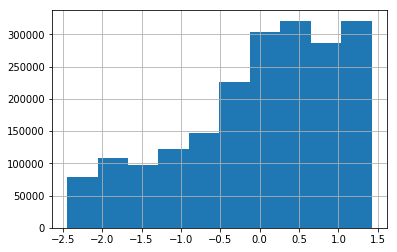

imgxisqnxusertypeitem_seq_number_fm_factor_1 0.0555811 0.0690305


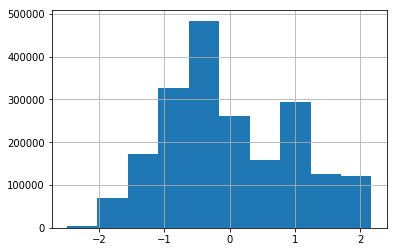

imgxisqnxusertypeuser_type_fm_factor_0 -0.143911 0.20138


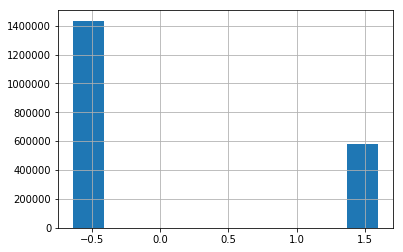

imgxisqnxusertypeimage_top_1_fm_bias -0.00809826 0.0460724


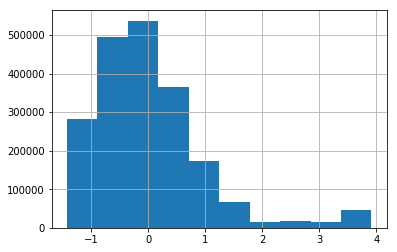

imgxisqnxusertypeitem_seq_number_fm_bias -0.0253746 0.0360931


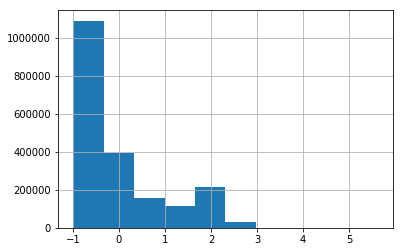

img_size 36285.2 18544.0


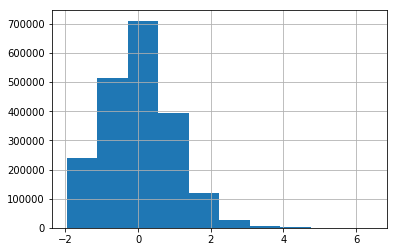

b_intensity_mean 105.828 49.5505


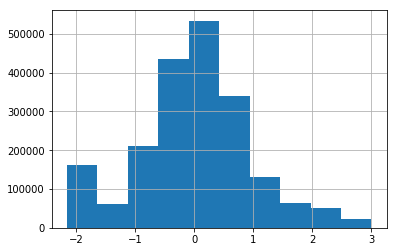

b_intensity_median 103.698 61.3544


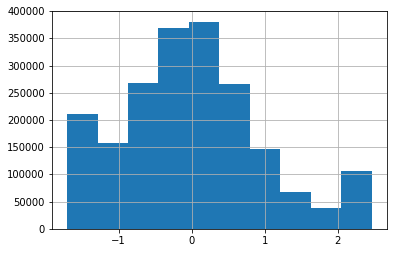

b_intensity_std 54.1379 22.261


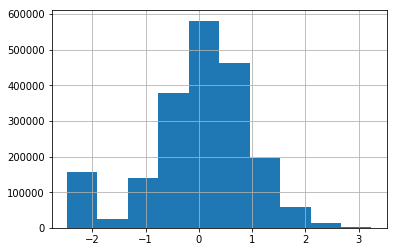

g_intensity_mean 121.179 51.1561


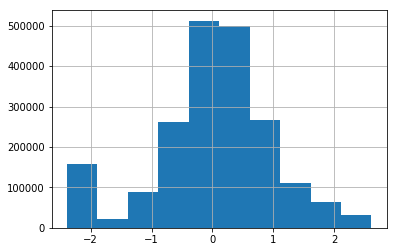

g_intensity_median 123.389 62.9303


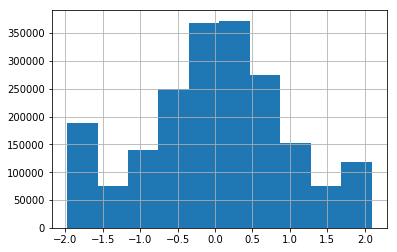

g_intensity_std 54.6415 22.9922


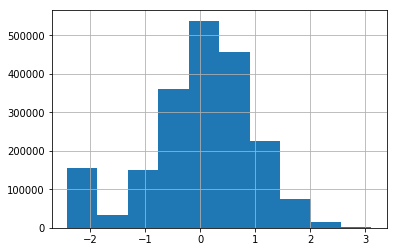

gray_intensity_mean 114.341 48.3847


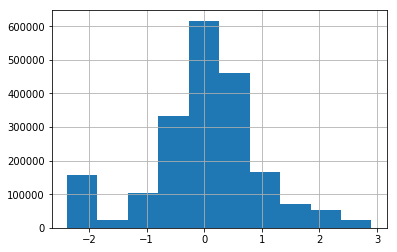

gray_intensity_median 114.595 59.4538


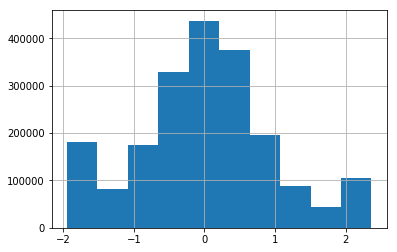

gray_intensity_std 52.9696 21.7975


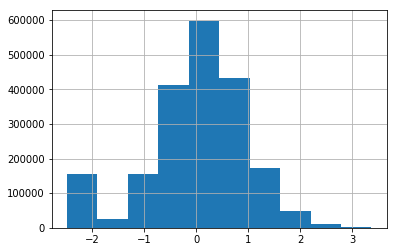

height 382.724 128.233


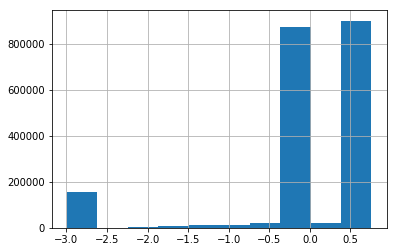

r_intensity_mean 112.505 48.6256


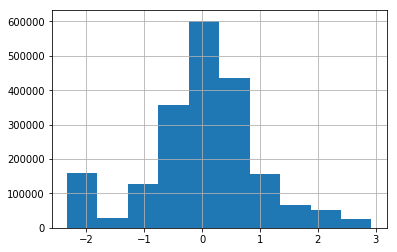

r_intensity_median 112.376 60.3554


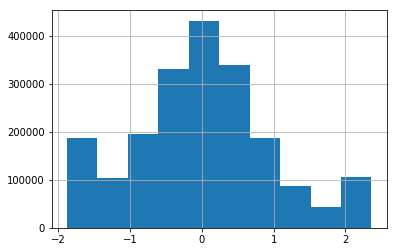

r_intensity_std 54.2715 22.1672


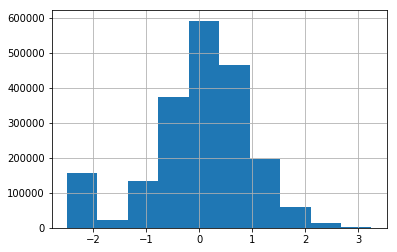

width 382.724 128.233


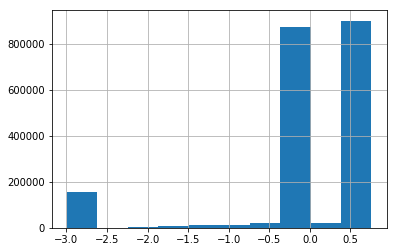

nasnet_nima_med -0.0226295 0.282721


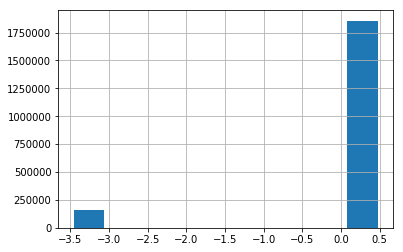

nasnet_nima_std 0.0222307 0.29561


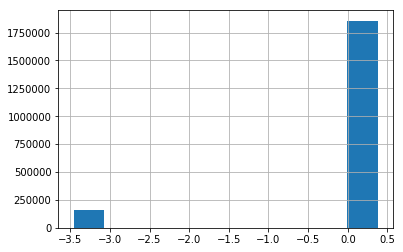

nasnet_nima_max 0.20384 0.348623


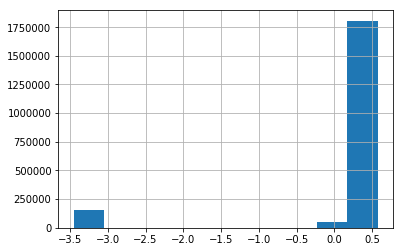

nasnet_nima_min -0.0741573 0.267694


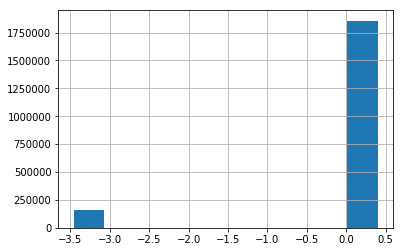

nasnet_nima_1_quartile -0.0598248 0.27186


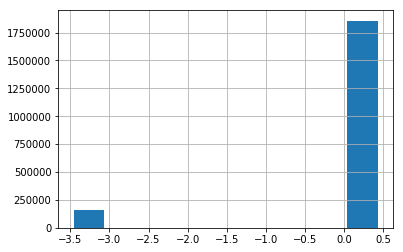

nasnet_nima_3_quartile 0.0633681 0.307729


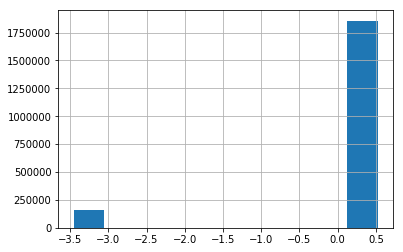

nasnet_nima_13_quartile_diff 0.0460475 0.302844


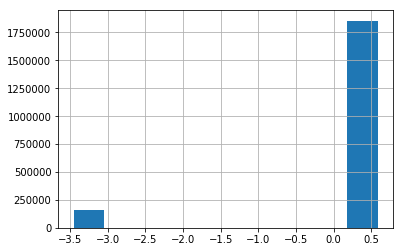

nasnet_nima_max_min_diff 0.200852 0.34774


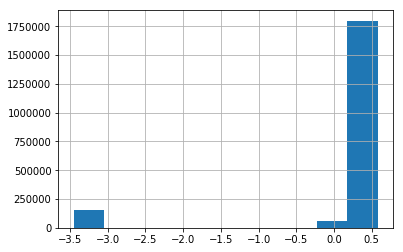

nasnet_nima_non_max_mean -0.00582665 0.287451


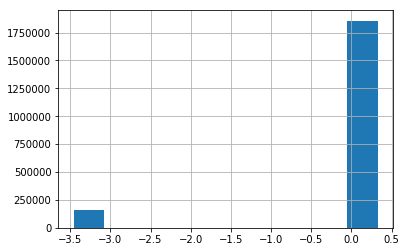

nasnet_nima_max_non_max_mean_diff 0.132521 0.328178


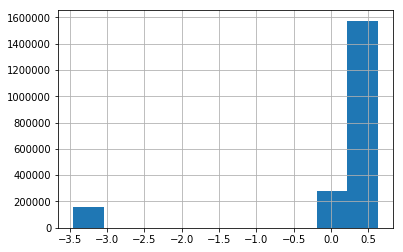

active_price_pred 4.49666 0.771698


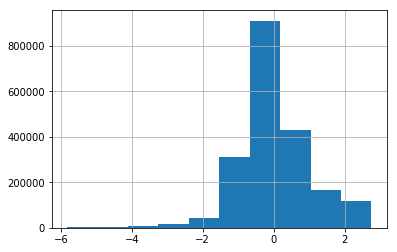

active_duration_pred 12.1267 3.16973


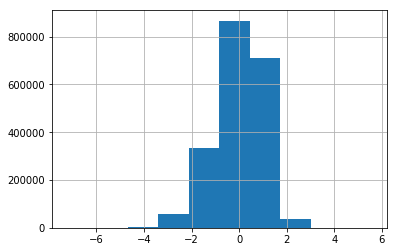

active_ad_count_pred 1.73469 0.435343


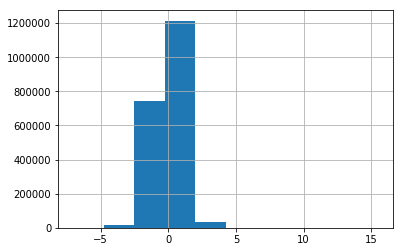

In [9]:
# step 2: standardize non-NA vlaues

from sklearn.preprocessing import StandardScaler

for col in numerical:
    all_df[col] = all_df[col].astype('float32')
    filter_ = ~all_df[col].isnull()
    selected_values = all_df.loc[filter_, col].values
    print(col, selected_values.mean(), selected_values.std())
    
    all_df.loc[filter_, col] = (selected_values-selected_values.mean())/selected_values.std()
    all_df[col].hist()
    plt.show()

In [10]:
# step 3: replace na values

for col in numerical:
    filter_ = ~all_df[col].isnull()
    selected_values = all_df.loc[filter_, col].values
    
    if abs(selected_values.min()) > abs(selected_values.max()):
        all_df.loc[:, col] = all_df[col].fillna(selected_values.min()*1.1)
    else:
        all_df.loc[:, col] = all_df[col].fillna(-selected_values.max())

### Encode categorical featurs

In [11]:
from sklearn.preprocessing import LabelEncoder
for col in categorical:
    all_df.loc[:, col] = LabelEncoder().fit_transform(all_df[col].values)

In [12]:
all_df.isnull().sum().max()

0

In [13]:
all_df.head(3)

,price,image_top_1,item_seq_number,activation_weekday,avg_days_up_user,avg_times_up_user,n_user_items,"cat_features_user_id_category_name_Одежда, обувь, аксессуары",cat_features_user_id_category_name_Детская одежда и обувь,cat_features_user_id_category_name_Товары для детей и игрушки,...,nasnet_nima_min,nasnet_nima_1_quartile,nasnet_nima_3_quartile,nasnet_nima_13_quartile_diff,nasnet_nima_max_min_diff,nasnet_nima_non_max_mean,nasnet_nima_max_non_max_mean_diff,active_price_pred,active_duration_pred,active_ad_count_pred
0,-0.570455,1006,-0.419426,-0.44586,-1.010986,0.006641,-0.244431,-0.645464,1.140600,2.530933,...,0.283995,0.286962,0.248675,0.249821,0.286667,0.289932,0.281349,-0.370787,0.586066,-0.191394
1,-1.303238,2905,-0.941306,-0.44586,0.996351,0.833716,-0.966191,1.572722,-0.576289,-0.361319,...,0.288687,0.293304,0.236378,0.231682,0.313346,0.285898,0.316686,-1.163271,-0.690659,-1.922023
2,-0.124856,525,0.110531,-0.44586,-2.657614,-4.860732,-0.966191,2.681815,-0.576289,-0.361319,...,0.305381,0.291789,0.342688,0.340917,0.303517,0.285473,0.320777,0.036945,-0.685729,-0.743221


In [ ]:
categorical

In [14]:
rnn_merged = {
    'train': all_df.loc[:merged['train'].shape[0]-1,:],
    'test': all_df.loc[merged['train'].shape[0]:,:].reset_index(drop=True),
    'y_train': merged['y_train'],
    'categorical': categorical
}

import pickle
pickle.dump(rnn_merged, open('rnn_merged.pkl', 'wb'))

### OHE for categorical features (for other model except RNN)

In [15]:
from sklearn.preprocessing import OneHotEncoder
column_filt = all_df.columns.isin(categorical)
ohe_features = OneHotEncoder(categorical_features=column_filt).fit_transform(all_df)

In [16]:
import gc
del all_df; gc.collect()

21232

In [17]:
from scipy.sparse import csr_matrix
ohe_features = csr_matrix(ohe_features)

In [18]:
ohe_features.shape

(2011862, 162363)

In [19]:
other_model_merged = {
    'train': ohe_features[:merged['train'].shape[0],:],
    'test': ohe_features[merged['train'].shape[0]:,:],
    'y_train': merged['y_train'],
}

import pickle
pickle.dump(other_model_merged, open('other_merged.pkl', 'wb'))